## Step 1. Open the data file and study the general information

(What will your research be about? What are you going to analyze?), fix the main aim of your work and the content plan of the main steps of your analysis at the beginning

**For this project, I will be conducting an analysis of data about games and gaming systems in order to help determine where  an online company's advertising campaign should focus its resources for the  upcoming year.  In order to do this, I will be analyzing game genres and game platforms and which are the most profitable in general.  I will also be analyzing game ratings, as well as user and critic ratings to determine which how much, if any, impact they have on a game's or a platform's profitability.**   

**Table of Contents:** 

**I.  Conducting a general overview of the information** 

**II.  Preparind data for analysis** 

**III.  Analysis of the data** 

**IV. Creating user profiles for each region** 

**V.  Hypotheses Testing** 

**VI.  Overall Conclusions** 


In [787]:
import pandas as pd 
from scipy import stats as st
import numpy as np

games = pd.read_csv('datasets/games.csv')

In [788]:
games.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [789]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [790]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [791]:
games['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

In [792]:
games['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [793]:
games['Year_of_Release'].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: Year_of_Release, dtype: int64

In [794]:
games['NA_sales'].value_counts()

0.00    4508
0.02     576
0.03     561
0.04     549
0.01     545
        ... 
4.98       1
4.21       1
6.82       1
5.05       1
9.00       1
Name: NA_sales, Length: 402, dtype: int64

In [795]:
games['EU_sales'].value_counts()

0.00    5870
0.01    1494
0.02    1308
0.03     926
0.04     709
        ... 
3.59       1
4.02       1
2.24       1
2.27       1
3.75       1
Name: EU_sales, Length: 307, dtype: int64

In [796]:
games['JP_sales'].value_counts()

0.00    10514
0.02      741
0.01      706
0.03      546
0.04      397
        ...  
1.16        1
2.12        1
7.20        1
2.17        1
6.50        1
Name: JP_sales, Length: 244, dtype: int64

In [797]:
games['Other_sales'].value_counts()

0.00    6601
0.01    3464
0.02    1618
0.03     926
0.04     654
        ... 
0.96       1
1.93       1
0.97       1
1.37       1
1.06       1
Name: Other_sales, Length: 155, dtype: int64

In [798]:
games['Critic_Score'].value_counts()

70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
20.0      3
17.0      1
22.0      1
13.0      1
21.0      1
Name: Critic_Score, Length: 82, dtype: int64

In [799]:
games['User_Score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.9       2
0.7       2
0.6       2
0         1
9.7       1
Name: User_Score, Length: 96, dtype: int64

In [800]:
games['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: Rating, dtype: int64

## Conclusion

**The majority of the data is complete with the exception of ratings/scores which have large gaps in the data.**

**As expected (from a former gamer), the majority of the games released came from Sony, Microsoft, and Nintendo platforms.**

**Additionally, the majority of the games released were Action and Sports.**

**The number of games released peaked between the years of 2005 and 2009 before beginning to slowly drop off.**

**The majority of the critic scores averaged around 70 and the majority of the user scores averaged around 7-8.**

**The majority of the games sold fall into two categories E (everyone) and T (teen).**

## Step 2. Prepare the data

In [801]:
## •	Replace the column names (make them lowercase).

games.columns= games.columns.str.lower()
print(games.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


In [802]:
## Filling in NaN rows and converting types

games['platform'].unique()

games['platform_numerical'] = games['platform']

games['platform_numerical'] = games["platform_numerical"].replace("Wii", 1)
games['platform_numerical'] = games["platform_numerical"].replace("NES", 2)
games['platform_numerical'] = games["platform_numerical"].replace("GB", 3)
games['platform_numerical'] = games["platform_numerical"].replace("DS", 4)
games['platform_numerical'] = games["platform_numerical"].replace("X360", 5)
games['platform_numerical'] = games["platform_numerical"].replace("PS3", 6)
games['platform_numerical'] = games["platform_numerical"].replace("PS2", 7)
games['platform_numerical'] = games["platform_numerical"].replace("SNES", 8)
games['platform_numerical'] = games["platform_numerical"].replace("GBA", 9)
games['platform_numerical'] = games["platform_numerical"].replace("PS4", 10)
games['platform_numerical'] = games["platform_numerical"].replace("3DS", 11)
games['platform_numerical'] = games["platform_numerical"].replace("N64", 12)
games['platform_numerical'] = games["platform_numerical"].replace("PS", 13)
games['platform_numerical'] = games["platform_numerical"].replace("XB", 14)
games['platform_numerical'] = games["platform_numerical"].replace("PC", 15)
games['platform_numerical'] = games["platform_numerical"].replace("2600", 16)
games['platform_numerical'] = games["platform_numerical"].replace("PSP", 17)
games['platform_numerical'] = games["platform_numerical"].replace("XOne", 18)
games['platform_numerical'] = games["platform_numerical"].replace("WiiU", 19)
games['platform_numerical'] = games["platform_numerical"].replace("GC", 20)
games['platform_numerical'] = games["platform_numerical"].replace("GEN", 21)
games['platform_numerical'] = games["platform_numerical"].replace("DC", 22)
games['platform_numerical'] = games["platform_numerical"].replace("PSV", 23)
games['platform_numerical'] = games["platform_numerical"].replace("SAT", 24)
games['platform_numerical'] = games["platform_numerical"].replace("SCD", 25)
games['platform_numerical'] = games["platform_numerical"].replace("WS", 26)
games['platform_numerical'] = games["platform_numerical"].replace("NG", 27)
games['platform_numerical'] = games["platform_numerical"].replace("TG16", 28)
games['platform_numerical'] = games["platform_numerical"].replace("3DO", 29)
games['platform_numerical'] = games["platform_numerical"].replace("GG", 30)
games['platform_numerical'] = games["platform_numerical"].replace("PCFX", 31)

games['platform_numerical'] = games['platform_numerical'].astype('int')

games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_numerical
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,1
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,2
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,1
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,1
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,3


**For this column, I converted all of the platforms to numerical values in case I decided to do mathemateical calculations later.  I  also converted the new column, 'platform_numerical' to int64.**

In [803]:
games.dropna(subset = ['year_of_release'], inplace = True)
games['year_of_release'] = games['year_of_release'].astype('int')
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                16444 non-null  object 
 1   platform            16446 non-null  object 
 2   year_of_release     16446 non-null  int32  
 3   genre               16444 non-null  object 
 4   na_sales            16446 non-null  float64
 5   eu_sales            16446 non-null  float64
 6   jp_sales            16446 non-null  float64
 7   other_sales         16446 non-null  float64
 8   critic_score        7983 non-null   float64
 9   user_score          9839 non-null   object 
 10  rating              9768 non-null   object 
 11  platform_numerical  16446 non-null  int32  
dtypes: float64(5), int32(2), object(5)
memory usage: 1.5+ MB


**For this column, I decided to delete the rows containing missing years of release and converted the remaining rows to int64.**

In [804]:


is_NaN = games[games['genre'].isnull()]
print(is_NaN)

games.dropna(subset = ['genre'], inplace = True)

 
games['genre_numerical'] = games['genre']

games['genre_numerical'] = games["genre_numerical"].replace("Sports", 1)
games['genre_numerical'] = games["genre_numerical"].replace("Platform", 2)
games['genre_numerical'] = games["genre_numerical"].replace("Racing", 3)
games['genre_numerical'] = games["genre_numerical"].replace("Role-Playing", 4)
games['genre_numerical'] = games["genre_numerical"].replace("Puzzle", 5)
games['genre_numerical'] = games["genre_numerical"].replace("Shooter", 6)
games['genre_numerical'] = games["genre_numerical"].replace("Simulation", 7)
games['genre_numerical'] = games["genre_numerical"].replace("Action", 8)
games['genre_numerical'] = games["genre_numerical"].replace("Fighting", 9)
games['genre_numerical'] = games["genre_numerical"].replace("Adventure", 10)
games['genre_numerical'] = games["genre_numerical"].replace("Strategy", 11)
games['genre_numerical'] = games["genre_numerical"].replace("Misc", 12)

games['genre_numerical'] = games['genre_numerical'].astype('int')

games.head()



      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN             1993   NaN      1.78      0.53      0.00   
14244  NaN      GEN             1993   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  platform_numerical  
659           0.08           NaN        NaN    NaN                  21  
14244         0.00           NaN        NaN    NaN                  21  


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_numerical,genre_numerical
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,1,1
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,2,2
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,1,3
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,1,1
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,3,4


**For this column, as there were only two missing data points, I attempted to find the names of the two games and fill in their genres.  However, when I pulled up the NaN rows (above), the names were also missing so I opted to delete these rows also.  Additionally, I converted the genre names to numbers for the purpose of calculations later and converted those numbers to int64**

In [805]:


games['critic_score'] = pd.to_numeric(games['critic_score'].fillna(""))

games.head()
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                16444 non-null  object 
 1   platform            16444 non-null  object 
 2   year_of_release     16444 non-null  int32  
 3   genre               16444 non-null  object 
 4   na_sales            16444 non-null  float64
 5   eu_sales            16444 non-null  float64
 6   jp_sales            16444 non-null  float64
 7   other_sales         16444 non-null  float64
 8   critic_score        7983 non-null   float64
 9   user_score          9839 non-null   object 
 10  rating              9768 non-null   object 
 11  platform_numerical  16444 non-null  int32  
 12  genre_numerical     16444 non-null  int32  
dtypes: float64(5), int32(3), object(5)
memory usage: 1.6+ MB


**Initially, I decided to fill in the NaN's in this column with the average critic score.  However, after watching the last webinar, we were advised against doing that because the number of missing data points is so high that it would skew any future calculations.  I did compare my initial calculation results (using the avg) with those obtained by leaving the sections blank and there was a difference --  not a massive difference but enough of one to warrant dropping the average scores.**

In [806]:
games['user_score'] = pd.to_numeric(games['user_score'].replace('tbd',np.nan))


games['user_score'] = games['user_score'].astype('float')


games.head()
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                16444 non-null  object 
 1   platform            16444 non-null  object 
 2   year_of_release     16444 non-null  int32  
 3   genre               16444 non-null  object 
 4   na_sales            16444 non-null  float64
 5   eu_sales            16444 non-null  float64
 6   jp_sales            16444 non-null  float64
 7   other_sales         16444 non-null  float64
 8   critic_score        7983 non-null   float64
 9   user_score          7463 non-null   float64
 10  rating              9768 non-null   object 
 11  platform_numerical  16444 non-null  int32  
 12  genre_numerical     16444 non-null  int32  
dtypes: float64(6), int32(3), object(4)
memory usage: 1.6+ MB


**As was the case with the critic score, I had initially replaced the NaN's with the average user score, but for the reason listed above, decided to leave them blank here also.**

In [807]:


games['rating_numerical'] = games['rating']


games['rating'] = games['rating'].fillna("")
games['rating_numerical'] = games['rating_numerical'].fillna("")


games['rating_numerical'] = games["rating_numerical"].replace("E", 1)
games['rating_numerical'] = games["rating_numerical"].replace("M", 2)
games['rating_numerical'] = games["rating_numerical"].replace("T", 3)
games['rating_numerical'] = games["rating_numerical"].replace("E10+", 4)
games['rating_numerical'] = games["rating_numerical"].replace("K-A", 5)
games['rating_numerical'] = games["rating_numerical"].replace("AO", 6)
games['rating_numerical'] = games["rating_numerical"].replace("EC", 7)
games['rating_numerical'] = games["rating_numerical"].replace("RP", 8)

games.head()



,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_numerical,genre_numerical,rating_numerical
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,1,1,1
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,,2,2,
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,1,3,1
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,1,1,1
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,,3,4,


**For this column, I replaced the NaN's with blanks and converted the ratings to numbers for calculations later.**

In [808]:
for element in games: 
    games['total_sales'] = (games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales'])
    
games.head()
    

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_numerical,genre_numerical,rating_numerical,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,1,1,1,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,,2,2,,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,1,3,1,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,1,1,1,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,,3,4,,31.38


**I created a for loop that totaled the sales for each game from every location listed.**

## Step 3. Analyze the data

In [809]:
##•	Look at how many games were released in different years. Is the data for every period significant?

games_per_year = games['year_of_release'].value_counts()
games_per_year.sort_index()





1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: int64

**The data is interesting, in that, as expected the number of games released per year increased consistently until 2009, and then began dropping off just as consistently.  I'm not sure whether this had something to do the the recession that happened during that time or if there was a switch during this time from the tradition game platforms to the games most people play today on their telephones.**  

In [810]:
##•	Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build 
##a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it
##generally take for new platforms to appear and old ones to fade?

sales_by_platform = games.groupby('platform')['total_sales'].sum().reset_index()
sales_by_platform = sales_by_platform.sort_values('total_sales', ascending=False).reset_index()
print(sales_by_platform)

    index platform  total_sales
0      16      PS2      1233.56
1      28     X360       961.24
2      17      PS3       931.34
3      26      Wii       891.18
4       4       DS       802.78
5      15       PS       727.58
6      18      PS4       314.14
7       6      GBA       312.88
8      19      PSP       289.53
9       2      3DS       257.81
10     13       PC       255.76
11      5       GB       254.43
12     29       XB       251.57
13     11      NES       251.05
14     10      N64       218.01
15     23     SNES       200.04
16      7       GC       196.73
17     30     XOne       159.32
18      0     2600        86.48
19     27     WiiU        82.19
20     20      PSV        53.81
21     21      SAT        33.59
22      8      GEN        28.35
23      3       DC        15.95
24     22      SCD         1.86
25     12       NG         1.44
26     25       WS         1.42
27     24     TG16         0.16
28      1      3DO         0.10
29      9       GG         0.04
30     1

In [811]:
#top_platforms = sales_by_platform.head(6) 


for i in range(6): 
    platform = sales_by_platform.iloc[i].platform
    print(platform)
    
    yearly_sales = games[games['platform'] == platform].groupby('year_of_release').sum() 
    print(yearly_sales)

PS2
                 na_sales  eu_sales  jp_sales  other_sales  critic_score  \
year_of_release                                                            
2000                16.08     10.64      8.87         3.58        3910.0   
2001                79.49     52.37     17.79        16.78       10552.0   
2002                96.54     65.27     21.85        21.72       14545.0   
2003                83.54     61.20     18.88        20.69       13374.0   
2004                96.78     56.01     19.17        39.85       14554.0   
2005                85.60     40.86     15.05        19.15       13413.0   
2006                49.93     21.61     17.64        14.24        8651.0   
2007                32.05     10.43      9.82        23.69        4807.0   
2008                21.23      7.63      5.73        19.31        2816.0   
2009                 9.36      4.94      1.94        10.16         912.0   
2010                 2.19      1.54      0.71         1.20          77.0   
2011    

**Based upon the data of the top six platforms, once a new gaming platform emerges, it's sales tend to increase for a period of five to six years before they begin to consistently decline.  It also generally takes a period of between ten to twelve years for their sales to essentially bottom out/collapse.**

**Moreover, with the exception of the time gap in between the PS and PS2 (6 years), new platforms generally appear every one to two years.**

**Similar data can be found across all of the platforms (see below) with the exception of the platforms that seemingly only existed for five to six years or less before being pulled from the market due to lack of popularity.  The more popular, well-known platforms all seem to follow the pattern described above**

In [812]:

for i in range(31): 
    platform = sales_by_platform.iloc[i].platform
    print(platform)
    
    yearly_sales = games[games['platform'] == platform].groupby('year_of_release').sum() 
    print(yearly_sales)

PS2
                 na_sales  eu_sales  jp_sales  other_sales  critic_score  \
year_of_release                                                            
2000                16.08     10.64      8.87         3.58        3910.0   
2001                79.49     52.37     17.79        16.78       10552.0   
2002                96.54     65.27     21.85        21.72       14545.0   
2003                83.54     61.20     18.88        20.69       13374.0   
2004                96.78     56.01     19.17        39.85       14554.0   
2005                85.60     40.86     15.05        19.15       13413.0   
2006                49.93     21.61     17.64        14.24        8651.0   
2007                32.05     10.43      9.82        23.69        4807.0   
2008                21.23      7.63      5.73        19.31        2816.0   
2009                 9.36      4.94      1.94        10.16         912.0   
2010                 2.19      1.54      0.71         1.20          77.0   
2011    

**Also of note, the newer platforms which haven't been on the market for 10 years or so (those from 2010plus) seem to have earned less overall per yeare than the games from the late 90s and early 2000s which is consistent with the number of games released from 2010 onward (which have been decreaseing).**

**Additionally, the release of gaming platforms has varied from the 1980s:**
**There was a more slow roll out of gaming platforms in the 80s with four platforms being released in total.**
**The release of platforms picked up in the 90s with two to three new platforms coming out every year or two with a total 13 platforms being released during this period.**
**The 2000s began with a pattern similar to that of the 90s, however, it dropped off after 2006 for some reason with a total of 9 platform being released during this period.**
**Finally the 2010s began much the same way the 2000s did but as of the data given, it also dropped off after 2013 for whatever reason with only five platforms having been released as of 2016.**  


In [813]:
##•	Determine what period you should take data for. To do so, look at your answers to the previous questions. 
##The data should allow you to build a prognosis for 2017.
##•	Work only with the data that you've decided is relevant. Disregard the data for previous years.


dates_downsized = games[(games['year_of_release'] >= 2005)]
print(dates_downsized.head())

                    name platform  year_of_release     genre  na_sales  \
0             Wii Sports      Wii             2006    Sports     41.36   
2         Mario Kart Wii      Wii             2008    Racing     15.68   
3      Wii Sports Resort      Wii             2009    Sports     15.61   
6  New Super Mario Bros.       DS             2006  Platform     11.28   
7               Wii Play      Wii             2006      Misc     13.96   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      E   
2     12.76      3.79         3.29          82.0         8.3      E   
3     10.93      3.28         2.95          80.0         8.0      E   
6      9.14      6.50         2.88          89.0         8.5      E   
7      9.18      2.93         2.84          58.0         6.6      E   

   platform_numerical  genre_numerical rating_numerical  total_sales  
0                   1                1                1  

**With the life span of platforms ranging between 10 to 12 years on average, I opted to use data going back to 2005 (11 years) -- a sort of middle ground.**

In [814]:
##•	Which platforms are leading in sales? Which ones are growing or shrinking? 
##Select several potentially profitable platforms.


for i in range(31): 
    platform = sales_by_platform.iloc[i].platform
    print(platform)
    
    ds_yearly_sales = dates_downsized[dates_downsized['platform'] == platform].groupby('year_of_release').sum() 
    print(ds_yearly_sales['total_sales'])

PS2
year_of_release
2005    160.66
2006    103.42
2007     75.99
2008     53.90
2009     26.40
2010      5.64
2011      0.45
Name: total_sales, dtype: float64
X360
year_of_release
2005      8.25
2006     51.62
2007     95.41
2008    135.26
2009    120.29
2010    170.03
2011    143.84
2012     99.74
2013     88.58
2014     34.74
2015     11.96
2016      1.52
Name: total_sales, dtype: float64
PS3
year_of_release
2006     20.96
2007     73.19
2008    118.52
2009    130.93
2010    142.17
2011    156.78
2012    107.36
2013    113.25
2014     47.76
2015     16.82
2016      3.60
Name: total_sales, dtype: float64
Wii
year_of_release
2006    137.15
2007    152.77
2008    171.32
2009    206.97
2010    127.95
2011     59.65
2012     21.71
2013      8.59
2014      3.75
2015      1.14
2016      0.18
Name: total_sales, dtype: float64
DS
year_of_release
2005    130.14
2006    119.81
2007    146.94
2008    145.31
2009    119.54
2010     85.02
2011     26.18
2012     11.01
2013      1.54
Name: total_sa

**Overall, none of the platforms are growing in profitability.  However, some are still quite profitable (even if it's less than in previous years).**  

**PS4 had a profit of 69.25 for 2016**

**XOne had a profit of 26.15 for 2016**

**3DS had a profit of 15.14 for 2016**

**PC had a profit of 5.25 for 2016 (PC profits have varied all of the map over the last decades)**

**PSV had a profit of 4.25 for 2016**

**WiiU had a profit of 4.60 for 2016**

**PS3 had a profit of 3.60 for 2016**

**X360 had a profit of 1.52 in 2016**


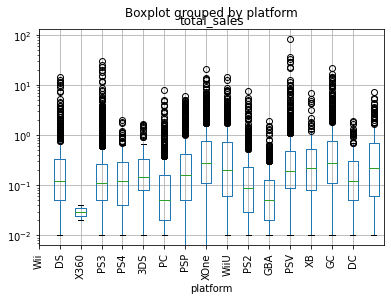

In [849]:
##•	Build a box plot for the global sales of all games, broken down by platform. 
##Are the differences in sales significant? What about average sales on various platforms? Describe your findings.

import matplotlib.pyplot as plt



unique_platforms = dates_downsized['platform'].unique()
platformrange = range(len(unique_platforms))

dates_downsized.boxplot(column="total_sales", by="platform", ) 
plt.xticks(platformrange, unique_platforms, rotation='vertical')


plt.yscale('log')


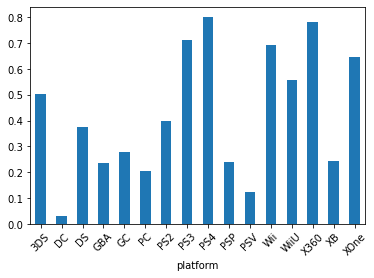

In [816]:
dates_downsized.groupby(['platform']).total_sales.mean().plot(kind='bar')
plt.xticks(rotation=45);

Correlation between critic_score and total_sales: 0.23351292111050298


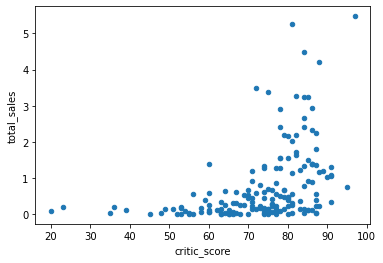

In [817]:
##•	Take a look at how user and professional reviews affect sales for one popular platform (you choose). 
##Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.


XOne_platform = dates_downsized[dates_downsized['platform'] == 'XOne']
XOne_platform.plot(x='critic_score', y='total_sales', kind='scatter')

print('Correlation between critic_score and total_sales:' ,dates_downsized['critic_score'].corr(dates_downsized['total_sales']))

Correlation between user_score and total_sales: 0.07847859823897499


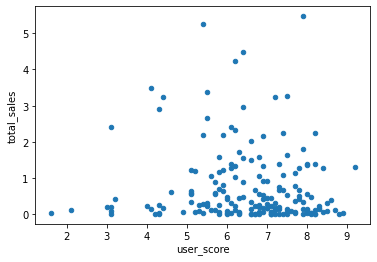

In [818]:
XOne_platform = dates_downsized[dates_downsized['platform'] == 'XOne']
XOne_platform.plot(x='user_score', y='total_sales', kind='scatter')

print('Correlation between user_score and total_sales:' ,dates_downsized['user_score'].corr(dates_downsized['total_sales']))

**As the scatter plots above demonstrate, there is a correlation between critic/user scores and the total sales of a game.  However, it is ver slight.  Also, user scores seem to matter much less that critic scores.** 

In [819]:
##•	Keeping your conclusions in mind, compare the sales of the same games on other platforms.

dates_downsized.groupby(['name']).filter(lambda x: x['platform'].count() >= 2.)



,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_numerical,genre_numerical,rating_numerical,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,6,8,2,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,5,8,2,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,5,6,2,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,,10,6,,14.63
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,5,6,2,14.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,,6,8,,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80.0,7.6,M,15,8,2,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,,7,3,,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,,6,8,,0.01


In [820]:
filtered_games = dates_downsized.groupby(['name']).filter(lambda x: x['platform'].count() >= 2.).groupby(['name', 'platform']).total_sales.sum().unstack(1)
filtered_games

platform,3DS,DS,GBA,GC,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne
name,,,,,,,,,,,,,,,
Frozen: Olaf's Quest,0.59,0.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
007: Quantum of Solace,NaN,0.13,NaN,NaN,0.02,0.43,1.15,NaN,NaN,NaN,0.65,NaN,1.48,NaN,NaN
11eyes: CrossOver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,NaN,NaN,NaN,0.02,NaN,NaN
187: Ride or Die,NaN,NaN,NaN,NaN,NaN,0.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,NaN
2010 FIFA World Cup South Africa,NaN,NaN,NaN,NaN,NaN,NaN,1.23,NaN,0.46,NaN,0.43,NaN,0.85,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iCarly,NaN,0.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.45,NaN,NaN,NaN,NaN
iCarly 2: iJoin The Click!,NaN,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,NaN,NaN,NaN,NaN
nail'd,NaN,NaN,NaN,NaN,NaN,NaN,0.12,NaN,NaN,NaN,NaN,NaN,0.11,NaN,NaN


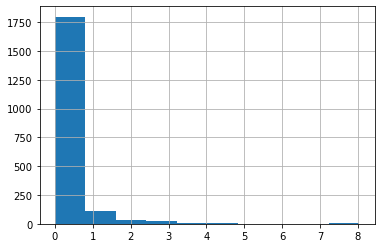

In [821]:
filtered_games.std(1).hist(bins=10)


**As shown in the previous three charts, sales of games vary from platform to platform.  Using STD as an example, most of the 
measures are close to 0 meaning that sales are quite similar.  Additionally, if you look above at the first chart, the game 
Call of Duty: Black Ops 3 has a 3 million dollar diffrence in sales between the PS4 and the X360 in NA and slight differences 
across the other sale areas.  However, if you look at the column, total_sales, you will see that, ultimately, total_sales are virtually identical.**

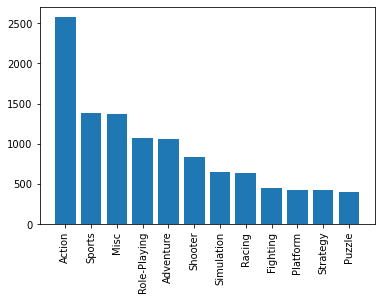

In [822]:


genre_pop_variable = dates_downsized['genre'].value_counts() 

genrepopularity = range(len(genre_pop_variable.index))


plt.bar(genrepopularity, genre_pop_variable,width=0.8, bottom=None, align='center')
plt.xticks(genrepopularity, genre_pop_variable.index, rotation='vertical')
plt.show()

In [823]:
filtered_genres = dates_downsized.groupby(['genre']).filter(lambda x: x['platform'].count() >= 2.).groupby(['genre', 'platform']).total_sales.sum().unstack(1)
filtered_genres


platform,3DS,DC,DS,GBA,GC,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne
genre,,,,,,,,,,,,,,,,
Action,57.84,NaN,110.79,9.92,11.29,26.06,97.60,297.87,96.10,61.53,17.02,106.67,19.07,236.71,16.26,37.31
Adventure,4.83,0.04,45.77,1.99,2.12,3.93,11.05,22.28,6.34,10.67,3.84,17.70,0.17,14.89,1.51,2.68
Fighting,10.56,NaN,7.08,NaN,1.98,0.13,32.90,51.11,8.65,21.59,2.62,23.36,6.27,37.32,2.05,2.45
Misc,10.99,NaN,135.22,11.70,3.43,1.06,60.01,44.93,8.19,12.89,4.43,212.67,12.46,88.95,1.47,7.43
Platform,32.53,NaN,65.50,6.59,4.42,0.43,12.90,29.32,7.69,17.07,2.56,88.87,21.53,11.29,1.43,0.93
Puzzle,5.57,NaN,78.81,0.73,0.41,0.91,1.69,0.44,0.02,4.17,0.18,15.30,1.32,0.73,NaN,NaN
Racing,14.87,NaN,36.41,2.18,3.18,3.59,27.90,71.31,12.14,32.94,2.51,60.13,7.87,64.13,6.08,9.79
Role-Playing,84.20,NaN,124.17,6.05,1.68,37.74,33.45,73.65,28.99,48.72,12.15,13.71,2.89,71.39,1.44,10.55
Shooter,1.22,0.02,7.86,0.17,2.14,31.12,29.18,192.29,88.56,19.63,3.88,25.69,6.01,275.62,14.84,60.33


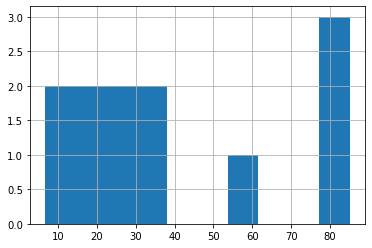

In [824]:
filtered_genres.std(1).hist(bins=10)

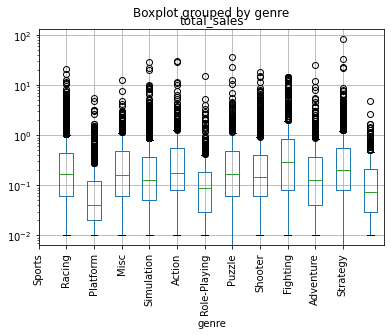

In [825]:
unique_genres = dates_downsized['genre'].unique()
genre_range = range(len(unique_genres))

dates_downsized.boxplot(column="total_sales", by="genre", ) 
plt.xticks(genre_range, unique_genres, rotation='vertical')


plt.yscale('log')

**There does seem to be a big difference in profit based on genres with Action games making much more money than the other games.**

## Step 4. Create a user profile for each region

In [826]:
##•	The top five platforms. Describe variations in their market shares from region to region

platform_sales = dates_downsized.groupby('platform')[['na_sales','eu_sales','jp_sales','other_sales']].sum()
platform_sales

,na_sales,eu_sales,jp_sales,other_sales
platform,,,,
3DS,82.65,61.27,100.62,13.27
DC,0.00,0.00,0.06,0.00
DS,371.98,184.48,171.35,57.68
GBA,26.85,10.19,4.78,0.72
GC,27.97,7.47,2.78,0.93
PC,45.84,103.01,0.00,18.94
PS2,200.49,87.14,50.98,87.85
PS3,390.13,327.21,79.41,134.59
PS4,108.74,141.09,15.96,48.35


In [827]:
platform_sales.na_sales.nlargest(5)

platform
X360    595.74
Wii     486.87
PS3     390.13
DS      371.98
PS2     200.49
Name: na_sales, dtype: float64

In [828]:
platform_sales.eu_sales.nlargest(5)

platform
PS3     327.21
X360    268.32
Wii     258.32
DS      184.48
PS4     141.09
Name: eu_sales, dtype: float64

In [829]:
platform_sales.jp_sales.nlargest(5)

platform
DS     171.35
3DS    100.62
PS3     79.41
PSP     73.85
Wii     68.28
Name: jp_sales, dtype: float64

**While the X360 is popular both in NA and EU, it is not one of the top five platforms in JP.  Moreover, it's popularity, i.e., profits are close to double in NA as opposed to EU.**

**Playstation games are popular across all three areas.  However, the particular Playstation platform varies.  In NA, the PS2 and PS3 are more popular.  And in EU, it's the PS3 and PS4 that are the most profitable.  Finally, in JP it's the PS3 and the PSP that are the most popular.**

**What's more interesting is the fact that in JP, three of the most popular gaming platforms are handheld platforms, i.e., the Nintendo DS, Nintendo 3DS and the Playstation PSP.  In NA and EU, the Nintendo DS is also popular but overall, the home gamins systems are more popular there.**

**Additionally, the sales/profits from platforms that are considered most popular in all the areas are much smaller in EU and JP.  Based on the top five gaming platforms for each area, total sales from NA are twice that as in EU and three times that as in JP.**

In [830]:
##top five genres 

genrepop = dates_downsized.groupby('genre')[['na_sales','eu_sales','jp_sales','other_sales']].sum()
genrepop

,na_sales,eu_sales,jp_sales,other_sales
genre,,,,
Action,580.04,372.58,108.39,141.03
Adventure,66.57,39.93,30.27,13.04
Fighting,104.63,47.09,31.68,24.67
Misc,311.82,167.09,72.49,64.43
Platform,149.75,86.93,36.32,30.06
Puzzle,49.03,33.81,18.64,8.80
Racing,163.58,129.05,17.57,44.83
Role-Playing,211.85,115.52,179.60,43.81
Shooter,400.96,248.07,20.67,88.86


In [831]:
genrepop.na_sales.nlargest(5)

genre
Action          580.04
Sports          432.70
Shooter         400.96
Misc            311.82
Role-Playing    211.85
Name: na_sales, dtype: float64

In [832]:
genrepop.eu_sales.nlargest(5)

genre
Action     372.58
Sports     265.61
Shooter    248.07
Misc       167.09
Racing     129.05
Name: eu_sales, dtype: float64

In [833]:
genrepop.jp_sales.nlargest(5)

genre
Role-Playing    179.60
Action          108.39
Misc             72.49
Sports           52.51
Platform         36.32
Name: jp_sales, dtype: float64

**In general, the three regions have similar likes as far as genres go.  However, there is one particular area in which each region differs completely.  All have Action, Sports, and Misc as part of their top 5.  But NA and EU both have Shooter games as a part of their top five and JP doesn't.  It actually ranks 9th in popularity in Japan.**

**Additionally, NA and JP both seem to prefer Role-Playing games, whereas EU doesn't.  Racing is instead in their top five.**

**Japan also seems to prefer Platform games whereas NA and EU do not.**

**Again, as was the case with gaming platforms, the amount of money spent in NA is substantially higher than in EU and JP.**

In [836]:
##Ratings and sales 

rating_sales = dates_downsized.groupby('rating')[['na_sales','eu_sales','jp_sales','other_sales']].sum()
rating_sales

,na_sales,eu_sales,jp_sales,other_sales
rating,,,,
,323.49,253.45,291.65,83.42
AO,1.26,0.61,0.00,0.09
E,873.10,508.71,147.33,176.80
E10+,343.02,181.92,39.05,71.37
EC,1.53,0.11,0.00,0.11
M,607.34,414.11,46.23,146.16
RP,0.00,0.03,0.00,0.01
T,479.08,258.17,91.32,115.37


In [837]:
rating_sales.na_sales.nlargest(5)

rating
E       873.10
M       607.34
T       479.08
E10+    343.02
        323.49
Name: na_sales, dtype: float64

In [838]:
rating_sales.eu_sales.nlargest(5)

rating
E       508.71
M       414.11
T       258.17
        253.45
E10+    181.92
Name: eu_sales, dtype: float64

In [839]:
rating_sales.jp_sales.nlargest(5)

rating
        291.65
E       147.33
T        91.32
M        46.23
E10+     39.05
Name: jp_sales, dtype: float64

**Ratings do seem to have an impact on sales in the various regions.  Games that are Rated E tend to bring in much more money than any of the other games.  In NA games that are rated E, bring in over 300 million dollars more than the next highest ranked game.  In EU, E games, bring in around 100 million dollars more.   

## Step 5. Test the following hypotheses:

In [ ]:
##Average user ratings of the Xbox One and PC platforms are the same

dates_downsized.groupby('platform').user_score.describe().loc[['XOne', 'PC']]
st.ttest_ind(dates_downsized[dates_downsized.platform=='XOne'].user_score.dropna(), dates_downsized[dates_downsized.platform=='PC'].user_score.dropna())

In [ ]:
alpha = .05 

results = st.ttest_ind(dates_downsized[dates_downsized.platform=='XOne'].user_score.dropna(), dates_downsized[dates_downsized.platform=='PC'].user_score.dropna())
print('p-value: ', results.pvalue)

alpha = 0.05
if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

In [ ]:
##Average user ratings for the Action and Sports genres are different.

dates_downsized.groupby('genre').user_score.describe().loc[['Action', 'Sports']]
st.ttest_ind(dates_downsized[dates_downsized.genre=='Action'].user_score.dropna(), dates_downsized[dates_downsized.genre=='Sports'].user_score.dropna())

In [ ]:
alpha = .05 

results = st.ttest_ind(dates_downsized[dates_downsized.genre=='Action'].user_score.dropna(), dates_downsized[dates_downsized.genre=='Sports'].user_score.dropna())
print('p-value: ', results.pvalue)

alpha = 0.05
if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

## General Conclusions

**In general, based upon the above analysis, it would be more beneficial/profitable for Ice to spend more money promoting either new or newer platforms (platforms that are 4 years old or less).**

**It would also be more beneficial if they promoted Action and Sports games overall, as well as, Shooter games in NA and EU and role-playing games in Japan.**

**Also, in general, it would potentially more profitable if Ice were to market more heavily in NA as they tend to spend double the amount of money on gaming.**